Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

Calling Iris Dataset

In [2]:
#Read Dataset csv file
iris_dataset = pd.read_csv('Iris.csv')
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Work with the Dataset:**

Label Encoder the Categorical Data

In [3]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
iris_dataset['SpeciesEncoder'] = label_encoder.fit_transform(iris_dataset['Species'])
# print(iris_dataset.tail())

Convert the Training Data Collection to numpy

In [4]:
iris_numpy_set = iris_dataset.to_numpy()
print(iris_numpy_set.shape)

(150, 7)


Seperate Data to Feature and Target

In [5]:
#Feature Value
X = iris_numpy_set[:,:4]
y = iris_numpy_set[:,6]
X.shape, y.shape

((150, 4), (150,))

Create a standard scaler object that if fit on the input data

In [6]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler().fit(X)
X = std_scaler.transform(X)

# One-Hot Categorical Encoding for the target(Y) data
y = tf.keras.utils.to_categorical(y,3)

print("\n Features after Scaling : \n------------------------")

print(X[:5,:])

print("\ntarget after one-hot encoding: \n-------------------")

print(y[:5])


 Features after Scaling : 
------------------------
[[-1.72054204 -0.90068117  1.03205722 -1.3412724 ]
 [-1.69744751 -1.14301691 -0.1249576  -1.3412724 ]
 [-1.67435299 -1.38535265  0.33784833 -1.39813811]
 [-1.65125846 -1.50652052  0.10644536 -1.2844067 ]
 [-1.62816394 -1.02184904  1.26346019 -1.3412724 ]]

target after one-hot encoding: 
-------------------
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


Split the data to training data set and test data set

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print("\n Train test Dimensions: \n--------------")

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


 Train test Dimensions: 
--------------
(120, 4) (30, 4) (120, 3) (30, 3)


**Work with the Model:**

Create a Model

Number of hidden layers

Number of nodes in each layer

Activation functions

Loss function and accuracy measurements.


Create Layers for Artificial Nueral Network (ANN)

In [8]:
from tensorflow import keras

#Total count of classes for output
IRIS_CLASS = 3

# Create a sequential model
model = keras.models.Sequential()

# Add first hidden layer
model.add(keras.layers.Dense(128,
                             input_shape = (4, ),
                             name = "First_Hidden_Layer",
                             activation= "relu",))

#Add second hidden layer
model.add(keras.layers.Dense(128,
                             name="Second_Hidden_Layer",
                             activation= "relu"))

#Final Output Layer
model.add(keras.layers.Dense(IRIS_CLASS,
                             name = "Output_Layer",
                             activation = "softmax"))

#Compile the model with optimizer loss, metrics
model.compile(optimizer="adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"],)

# Print the model summary
model.summary()

# Set hyperparameters for training
VERBOSE = 1
BATCH_SIZE = 16
EPOCHS = 20
VALIDATION_SPLIT = 0.2

print("\nTraining Progress: \n------------------")

# Fitting the model. This will perform the entire training cycle, including forward propagation, loss computation,
# backward propagation, and gradient descent.

history = model.fit(X_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=VERBOSE,
                    validation_split=VALIDATION_SPLIT)



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ First_Hidden_Layer (Dense)      │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Second_Hidden_Layer (Dense)     │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,539 (68.51 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)


Training Progress: 
------------------
Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 472ms/step - accuracy: 0.3670 - loss: 1.0880 - val_accuracy: 0.7917 - val_loss: 0.8503
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8103 - loss: 0.8212 - val_accuracy: 0.8750 - val_loss: 0.6478
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8260 - loss: 0.6229 - val_accuracy: 0.8750 - val_loss: 0.5053
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.8932 - loss: 0.4627 - val_accuracy: 0.9167 - val_loss: 0.4109
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8997 - loss: 0.3704 - val_accuracy: 0.9583 - val_loss: 0.3503
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9190 - loss: 0.2780 - val_accuracy: 0.9583 - val_loss: 0.3127
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9046 - loss: 0.2832 - val_accuracy: 0.9583 - val_loss: 0.2882
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.9204 - loss: 0.2377

Lets analyse the training processing by plot


Accuracy During Training: 
-------------------------


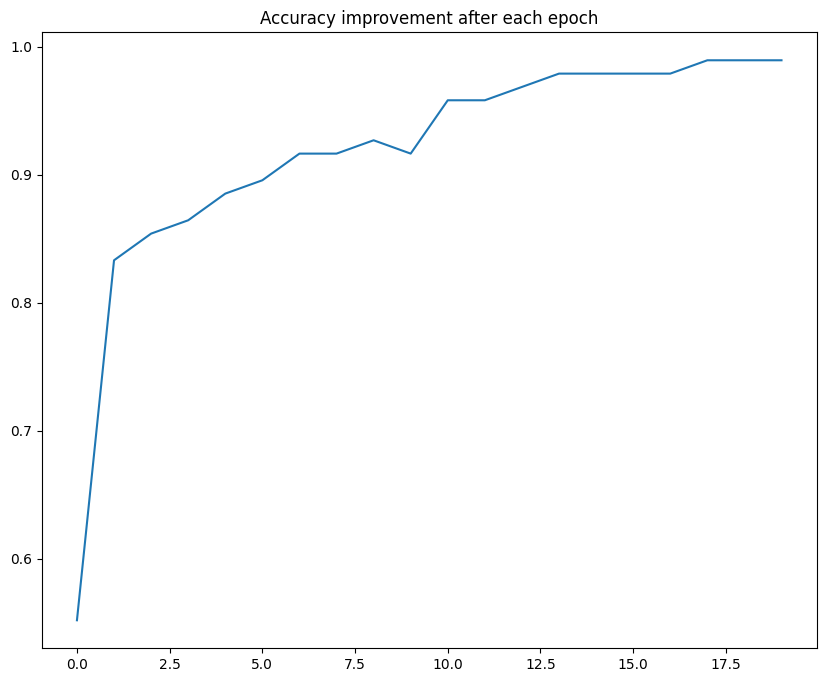

In [9]:
print("\nAccuracy During Training: \n-------------------------")

pd.DataFrame(history.history)["accuracy"].plot(figsize=(10,8))
plt.title("Accuracy improvement after each epoch")
plt.show()

In [10]:
print("\nEvaluate against test dataset: \n--------------------------")

model.evaluate(X_test, y_test)


Evaluate against test dataset: 
--------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 1.0000 - loss: 0.0270


[0.027024907991290092, 1.0]

In [11]:
# Saving a model
model.save("iris_save.keras")

#load the model
loaded_model=keras.models.load_model("iris_save.keras")

#print the model summary
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ First_Hidden_Layer (Dense)      │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Second_Hidden_Layer (Dense)     │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,619 (205.55 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,080 (137.04 KB)

In [12]:
# raw prediction data
prediction_input=[[2.6,12.,2.4,4.4]]

# scale the prediction data with the same scaling object
scaled_input=std_scaler.transform(prediction_input)

# get the raw prediction probabilities
raw_prediction=loaded_model.predict(scaled_input)
print("Raw Prediction Output (Probabilities):",raw_prediction)

#Find Prediction
prediction=np.argmax(raw_prediction)
print("Prediction is",label_encoder.inverse_transform([prediction]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Raw Prediction Output (Probabilities): [[1.1900267e-09 9.9999952e-01 4.7641444e-07]]
Prediction is ['Iris-versicolor']
